In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import linear_model, metrics, model_selection
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

In [168]:
df = pd.read_csv("Datos Producción Final.csv")
df

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2
0,23019,1,0,14615,2023-03-21 07:30:00,2023-03-23 06:30:00,82.4,17.3,91.2,184000000.0,17825,0.0,0.0,1747.9,6.0
1,23020,1,0,14616,2023-03-21 07:30:00,2023-03-23 06:30:00,80.4,18.8,91.2,182000000.0,14246,0.0,0.0,1676.2,6.6
2,23021,1,0,13170,2023-03-22 07:30:00,2023-03-24 06:30:00,66.4,16.2,86.4,248000000.0,17825,0.0,0.0,1928.5,8.1
3,23022,1,0,14614,2023-03-22 07:30:00,2023-03-24 06:30:00,85.6,18.5,83.2,230000000.0,12912,0.0,0.0,1782.8,5.9
4,23023,1,0,14615,2023-03-28 07:27:00,2023-03-30 10:00:00,77.6,17.1,74.4,133000000.0,17825,26.6,20.9,1861.8,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,24049,1,0,14617,2024-03-16 09:22:00,2024-03-18 08:23:00,84.0,19.0,73.0,165000000.0,12912,31.0,17.0,1342.8,4.9
148,24050,1,0,14614,2024-03-23 08:57:00,2024-03-25 08:28:00,84.0,18.0,68.0,152000000.0,6379,29.0,27.0,1422.8,3.7
149,24051,1,0,13169,2024-03-23 08:57:00,2024-03-25 08:33:00,84.0,18.0,81.0,161000000.0,12912,33.0,19.0,1486.6,5.5
150,24052,2,24050,14614,2024-03-25 13:28:00,2024-03-27 08:51:00,86.0,17.0,69.0,148000000.0,14246,24.0,18.0,1857.3,6.0


In [169]:
df_cin_fin = pd.read_csv("Datos Cineticos Cultivo Final")
df_cin_fin

,Lote,Fecha,Turbidez,Viabilidad,Glucosa g/L
0,23019,2023-03-21 07:30:00,17.28,8330000.0,1.740
1,23019,2023-03-21 11:00:00,17.28,14000000.0,1.970
2,23019,2023-03-21 14:00:00,18.40,16900000.0,1.920
3,23019,2023-03-21 18:00:00,19.76,24700000.0,1.880
4,23019,2023-03-22 07:00:00,39.12,100000000.0,1.570
...,...,...,...,...,...
1836,24110,2024-07-04 15:30:00,58.40,80500000.0,1.584
1837,24110,2024-07-04 19:30:00,69.76,102000000.0,1.248
1838,24110,2024-07-05 06:30:00,100.80,153000000.0,0.600
1839,24110,2024-07-05 08:00:00,104.80,151000000.0,0.520


In [170]:
df_cin_fin['Turbidez inicial'] = df_cin_fin.groupby('Lote')['Turbidez'].transform('first')
df_cin_fin['Turbidez final'] = df_cin_fin.groupby('Lote')['Turbidez'].transform('last')
df_cin_fin

,Lote,Fecha,Turbidez,Viabilidad,Glucosa g/L,Turbidez inicial,Turbidez final
0,23019,2023-03-21 07:30:00,17.28,8330000.0,1.740,17.28,91.2
1,23019,2023-03-21 11:00:00,17.28,14000000.0,1.970,17.28,91.2
2,23019,2023-03-21 14:00:00,18.40,16900000.0,1.920,17.28,91.2
3,23019,2023-03-21 18:00:00,19.76,24700000.0,1.880,17.28,91.2
4,23019,2023-03-22 07:00:00,39.12,100000000.0,1.570,17.28,91.2
...,...,...,...,...,...,...,...
1836,24110,2024-07-04 15:30:00,58.40,80500000.0,1.584,26.56,104.8
1837,24110,2024-07-04 19:30:00,69.76,102000000.0,1.248,26.56,104.8
1838,24110,2024-07-05 06:30:00,100.80,153000000.0,0.600,26.56,104.8
1839,24110,2024-07-05 08:00:00,104.80,151000000.0,0.520,26.56,104.8


In [171]:
df_cin_fin["Viabilidad inicial"] = df_cin_fin.groupby('Lote')['Viabilidad'].transform('first')
df_cin_fin["Viabilidad final"] = df_cin_fin.groupby('Lote')['Viabilidad'].transform('last')
df_cin_fin

,Lote,Fecha,Turbidez,Viabilidad,Glucosa g/L,Turbidez inicial,Turbidez final,Viabilidad inicial,Viabilidad final
0,23019,2023-03-21 07:30:00,17.28,8330000.0,1.740,17.28,91.2,8330000.0,185000000.0
1,23019,2023-03-21 11:00:00,17.28,14000000.0,1.970,17.28,91.2,8330000.0,185000000.0
2,23019,2023-03-21 14:00:00,18.40,16900000.0,1.920,17.28,91.2,8330000.0,185000000.0
3,23019,2023-03-21 18:00:00,19.76,24700000.0,1.880,17.28,91.2,8330000.0,185000000.0
4,23019,2023-03-22 07:00:00,39.12,100000000.0,1.570,17.28,91.2,8330000.0,185000000.0
...,...,...,...,...,...,...,...,...,...
1836,24110,2024-07-04 15:30:00,58.40,80500000.0,1.584,26.56,104.8,10800000.0,157000000.0
1837,24110,2024-07-04 19:30:00,69.76,102000000.0,1.248,26.56,104.8,10800000.0,157000000.0
1838,24110,2024-07-05 06:30:00,100.80,153000000.0,0.600,26.56,104.8,10800000.0,157000000.0
1839,24110,2024-07-05 08:00:00,104.80,151000000.0,0.520,26.56,104.8,10800000.0,157000000.0


In [172]:
df_cin_fin_via = df_cin_fin[["Lote","Viabilidad inicial","Viabilidad final"]]
df_cin_fin_via = df_cin_fin_via.drop_duplicates()
df_cin_fin_via


,Lote,Viabilidad inicial,Viabilidad final
0,23019,8330000.0,185000000.0
10,23020,7460000.0,180000000.0
20,23021,8910000.0,245000000.0
31,23022,7850000.0,229000000.0
42,23023,5800000.0,212000000.0
...,...,...,...
1812,24104,75700000.0,171000000.0
1815,24106,10000000.0,163000000.0
1819,24107,10400000.0,151000000.0
1823,24109,15100000.0,196000000.0


In [173]:
df_cin_fin_tur = df_cin_fin[["Lote","Turbidez inicial","Turbidez final"]]
df_cin_fin_tur = df_cin_fin_tur.drop_duplicates()
df_cin_fin_tur


,Lote,Turbidez inicial,Turbidez final
0,23019,17.28,91.2
10,23020,18.80,91.2
20,23021,16.16,86.4
31,23022,18.48,83.2
42,23023,17.12,81.6
...,...,...,...
1812,24104,59.12,82.4
1815,24106,23.60,84.0
1819,24107,21.76,87.2
1823,24109,23.84,94.4


In [174]:
df = pd.merge(df,df_cin_fin_tur, left_on="LOTE", right_on="Lote", how="left")
df

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2,Lote,Turbidez inicial,Turbidez final
0,23019,1,0,14615,2023-03-21 07:30:00,2023-03-23 06:30:00,82.4,17.3,91.2,184000000.0,17825,0.0,0.0,1747.9,6.0,23019,17.28,91.20
1,23020,1,0,14616,2023-03-21 07:30:00,2023-03-23 06:30:00,80.4,18.8,91.2,182000000.0,14246,0.0,0.0,1676.2,6.6,23020,18.80,91.20
2,23021,1,0,13170,2023-03-22 07:30:00,2023-03-24 06:30:00,66.4,16.2,86.4,248000000.0,17825,0.0,0.0,1928.5,8.1,23021,16.16,86.40
3,23022,1,0,14614,2023-03-22 07:30:00,2023-03-24 06:30:00,85.6,18.5,83.2,230000000.0,12912,0.0,0.0,1782.8,5.9,23022,18.48,83.20
4,23023,1,0,14615,2023-03-28 07:27:00,2023-03-30 10:00:00,77.6,17.1,74.4,133000000.0,17825,26.6,20.9,1861.8,3.0,23023,17.12,81.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,24049,1,0,14617,2024-03-16 09:22:00,2024-03-18 08:23:00,84.0,19.0,73.0,165000000.0,12912,31.0,17.0,1342.8,4.9,24049,18.88,72.64
148,24050,1,0,14614,2024-03-23 08:57:00,2024-03-25 08:28:00,84.0,18.0,68.0,152000000.0,6379,29.0,27.0,1422.8,3.7,24050,17.76,67.60
149,24051,1,0,13169,2024-03-23 08:57:00,2024-03-25 08:33:00,84.0,18.0,81.0,161000000.0,12912,33.0,19.0,1486.6,5.5,24051,17.76,80.80
150,24052,2,24050,14614,2024-03-25 13:28:00,2024-03-27 08:51:00,86.0,17.0,69.0,148000000.0,14246,24.0,18.0,1857.3,6.0,24052,17.28,69.04


In [175]:
df["Turbidez inicio cultivo"] = df["Turbidez inicial"]
df["Turbidez fin cultivo"] = df["Turbidez final"]
df

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2,Lote,Turbidez inicial,Turbidez final
0,23019,1,0,14615,2023-03-21 07:30:00,2023-03-23 06:30:00,82.4,17.28,91.20,184000000.0,17825,0.0,0.0,1747.9,6.0,23019,17.28,91.20
1,23020,1,0,14616,2023-03-21 07:30:00,2023-03-23 06:30:00,80.4,18.80,91.20,182000000.0,14246,0.0,0.0,1676.2,6.6,23020,18.80,91.20
2,23021,1,0,13170,2023-03-22 07:30:00,2023-03-24 06:30:00,66.4,16.16,86.40,248000000.0,17825,0.0,0.0,1928.5,8.1,23021,16.16,86.40
3,23022,1,0,14614,2023-03-22 07:30:00,2023-03-24 06:30:00,85.6,18.48,83.20,230000000.0,12912,0.0,0.0,1782.8,5.9,23022,18.48,83.20
4,23023,1,0,14615,2023-03-28 07:27:00,2023-03-30 10:00:00,77.6,17.12,81.60,133000000.0,17825,26.6,20.9,1861.8,3.0,23023,17.12,81.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,24049,1,0,14617,2024-03-16 09:22:00,2024-03-18 08:23:00,84.0,18.88,72.64,165000000.0,12912,31.0,17.0,1342.8,4.9,24049,18.88,72.64
148,24050,1,0,14614,2024-03-23 08:57:00,2024-03-25 08:28:00,84.0,17.76,67.60,152000000.0,6379,29.0,27.0,1422.8,3.7,24050,17.76,67.60
149,24051,1,0,13169,2024-03-23 08:57:00,2024-03-25 08:33:00,84.0,17.76,80.80,161000000.0,12912,33.0,19.0,1486.6,5.5,24051,17.76,80.80
150,24052,2,24050,14614,2024-03-25 13:28:00,2024-03-27 08:51:00,86.0,17.28,69.04,148000000.0,14246,24.0,18.0,1857.3,6.0,24052,17.28,69.04


In [176]:
df = df.drop(["Lote","Turbidez inicial","Turbidez final"],axis="columns")
df

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2
0,23019,1,0,14615,2023-03-21 07:30:00,2023-03-23 06:30:00,82.4,17.28,91.20,184000000.0,17825,0.0,0.0,1747.9,6.0
1,23020,1,0,14616,2023-03-21 07:30:00,2023-03-23 06:30:00,80.4,18.80,91.20,182000000.0,14246,0.0,0.0,1676.2,6.6
2,23021,1,0,13170,2023-03-22 07:30:00,2023-03-24 06:30:00,66.4,16.16,86.40,248000000.0,17825,0.0,0.0,1928.5,8.1
3,23022,1,0,14614,2023-03-22 07:30:00,2023-03-24 06:30:00,85.6,18.48,83.20,230000000.0,12912,0.0,0.0,1782.8,5.9
4,23023,1,0,14615,2023-03-28 07:27:00,2023-03-30 10:00:00,77.6,17.12,81.60,133000000.0,17825,26.6,20.9,1861.8,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,24049,1,0,14617,2024-03-16 09:22:00,2024-03-18 08:23:00,84.0,18.88,72.64,165000000.0,12912,31.0,17.0,1342.8,4.9
148,24050,1,0,14614,2024-03-23 08:57:00,2024-03-25 08:28:00,84.0,17.76,67.60,152000000.0,6379,29.0,27.0,1422.8,3.7
149,24051,1,0,13169,2024-03-23 08:57:00,2024-03-25 08:33:00,84.0,17.76,80.80,161000000.0,12912,33.0,19.0,1486.6,5.5
150,24052,2,24050,14614,2024-03-25 13:28:00,2024-03-27 08:51:00,86.0,17.28,69.04,148000000.0,14246,24.0,18.0,1857.3,6.0


In [177]:
df_cin_fin

,Lote,Fecha,Turbidez,Viabilidad,Glucosa g/L,Turbidez inicial,Turbidez final,Viabilidad inicial,Viabilidad final
0,23019,2023-03-21 07:30:00,17.28,8330000.0,1.740,17.28,91.2,8330000.0,185000000.0
1,23019,2023-03-21 11:00:00,17.28,14000000.0,1.970,17.28,91.2,8330000.0,185000000.0
2,23019,2023-03-21 14:00:00,18.40,16900000.0,1.920,17.28,91.2,8330000.0,185000000.0
3,23019,2023-03-21 18:00:00,19.76,24700000.0,1.880,17.28,91.2,8330000.0,185000000.0
4,23019,2023-03-22 07:00:00,39.12,100000000.0,1.570,17.28,91.2,8330000.0,185000000.0
...,...,...,...,...,...,...,...,...,...
1836,24110,2024-07-04 15:30:00,58.40,80500000.0,1.584,26.56,104.8,10800000.0,157000000.0
1837,24110,2024-07-04 19:30:00,69.76,102000000.0,1.248,26.56,104.8,10800000.0,157000000.0
1838,24110,2024-07-05 06:30:00,100.80,153000000.0,0.600,26.56,104.8,10800000.0,157000000.0
1839,24110,2024-07-05 08:00:00,104.80,151000000.0,0.520,26.56,104.8,10800000.0,157000000.0


In [178]:
df_cin_fin_via

,Lote,Viabilidad inicial,Viabilidad final
0,23019,8330000.0,185000000.0
10,23020,7460000.0,180000000.0
20,23021,8910000.0,245000000.0
31,23022,7850000.0,229000000.0
42,23023,5800000.0,212000000.0
...,...,...,...
1812,24104,75700000.0,171000000.0
1815,24106,10000000.0,163000000.0
1819,24107,10400000.0,151000000.0
1823,24109,15100000.0,196000000.0


In [179]:
df

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2
0,23019,1,0,14615,2023-03-21 07:30:00,2023-03-23 06:30:00,82.4,17.28,91.20,184000000.0,17825,0.0,0.0,1747.9,6.0
1,23020,1,0,14616,2023-03-21 07:30:00,2023-03-23 06:30:00,80.4,18.80,91.20,182000000.0,14246,0.0,0.0,1676.2,6.6
2,23021,1,0,13170,2023-03-22 07:30:00,2023-03-24 06:30:00,66.4,16.16,86.40,248000000.0,17825,0.0,0.0,1928.5,8.1
3,23022,1,0,14614,2023-03-22 07:30:00,2023-03-24 06:30:00,85.6,18.48,83.20,230000000.0,12912,0.0,0.0,1782.8,5.9
4,23023,1,0,14615,2023-03-28 07:27:00,2023-03-30 10:00:00,77.6,17.12,81.60,133000000.0,17825,26.6,20.9,1861.8,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,24049,1,0,14617,2024-03-16 09:22:00,2024-03-18 08:23:00,84.0,18.88,72.64,165000000.0,12912,31.0,17.0,1342.8,4.9
148,24050,1,0,14614,2024-03-23 08:57:00,2024-03-25 08:28:00,84.0,17.76,67.60,152000000.0,6379,29.0,27.0,1422.8,3.7
149,24051,1,0,13169,2024-03-23 08:57:00,2024-03-25 08:33:00,84.0,17.76,80.80,161000000.0,12912,33.0,19.0,1486.6,5.5
150,24052,2,24050,14614,2024-03-25 13:28:00,2024-03-27 08:51:00,86.0,17.28,69.04,148000000.0,14246,24.0,18.0,1857.3,6.0


In [180]:
df = pd.merge(df,df_cin_fin_via, left_on="LOTE", right_on="Lote", how= "left")

In [181]:
df

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2,Lote,Viabilidad inicial,Viabilidad final
0,23019,1,0,14615,2023-03-21 07:30:00,2023-03-23 06:30:00,82.4,17.28,91.20,184000000.0,17825,0.0,0.0,1747.9,6.0,23019,8330000.0,185000000.0
1,23020,1,0,14616,2023-03-21 07:30:00,2023-03-23 06:30:00,80.4,18.80,91.20,182000000.0,14246,0.0,0.0,1676.2,6.6,23020,7460000.0,180000000.0
2,23021,1,0,13170,2023-03-22 07:30:00,2023-03-24 06:30:00,66.4,16.16,86.40,248000000.0,17825,0.0,0.0,1928.5,8.1,23021,8910000.0,245000000.0
3,23022,1,0,14614,2023-03-22 07:30:00,2023-03-24 06:30:00,85.6,18.48,83.20,230000000.0,12912,0.0,0.0,1782.8,5.9,23022,7850000.0,229000000.0
4,23023,1,0,14615,2023-03-28 07:27:00,2023-03-30 10:00:00,77.6,17.12,81.60,133000000.0,17825,26.6,20.9,1861.8,3.0,23023,5800000.0,212000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,24049,1,0,14617,2024-03-16 09:22:00,2024-03-18 08:23:00,84.0,18.88,72.64,165000000.0,12912,31.0,17.0,1342.8,4.9,24049,5650000.0,165000000.0
148,24050,1,0,14614,2024-03-23 08:57:00,2024-03-25 08:28:00,84.0,17.76,67.60,152000000.0,6379,29.0,27.0,1422.8,3.7,24050,5560000.0,153000000.0
149,24051,1,0,13169,2024-03-23 08:57:00,2024-03-25 08:33:00,84.0,17.76,80.80,161000000.0,12912,33.0,19.0,1486.6,5.5,24051,5160000.0,158000000.0
150,24052,2,24050,14614,2024-03-25 13:28:00,2024-03-27 08:51:00,86.0,17.28,69.04,148000000.0,14246,24.0,18.0,1857.3,6.0,24052,8510000.0,148000000.0


In [182]:
df["Viabilidad final cultivo"] = df["Viabilidad final"]

In [183]:
df = df.drop(["Lote","Viabilidad final"], axis="columns")
df

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2,Viabilidad inicial
0,23019,1,0,14615,2023-03-21 07:30:00,2023-03-23 06:30:00,82.4,17.28,91.20,185000000.0,17825,0.0,0.0,1747.9,6.0,8330000.0
1,23020,1,0,14616,2023-03-21 07:30:00,2023-03-23 06:30:00,80.4,18.80,91.20,180000000.0,14246,0.0,0.0,1676.2,6.6,7460000.0
2,23021,1,0,13170,2023-03-22 07:30:00,2023-03-24 06:30:00,66.4,16.16,86.40,245000000.0,17825,0.0,0.0,1928.5,8.1,8910000.0
3,23022,1,0,14614,2023-03-22 07:30:00,2023-03-24 06:30:00,85.6,18.48,83.20,229000000.0,12912,0.0,0.0,1782.8,5.9,7850000.0
4,23023,1,0,14615,2023-03-28 07:27:00,2023-03-30 10:00:00,77.6,17.12,81.60,212000000.0,17825,26.6,20.9,1861.8,3.0,5800000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,24049,1,0,14617,2024-03-16 09:22:00,2024-03-18 08:23:00,84.0,18.88,72.64,165000000.0,12912,31.0,17.0,1342.8,4.9,5650000.0
148,24050,1,0,14614,2024-03-23 08:57:00,2024-03-25 08:28:00,84.0,17.76,67.60,153000000.0,6379,29.0,27.0,1422.8,3.7,5560000.0
149,24051,1,0,13169,2024-03-23 08:57:00,2024-03-25 08:33:00,84.0,17.76,80.80,158000000.0,12912,33.0,19.0,1486.6,5.5,5160000.0
150,24052,2,24050,14614,2024-03-25 13:28:00,2024-03-27 08:51:00,86.0,17.28,69.04,148000000.0,14246,24.0,18.0,1857.3,6.0,8510000.0


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   LOTE                          152 non-null    int64  
 1   Orden en el encadenado        152 non-null    int64  
 2   LOTE parental                 152 non-null    int64  
 3   ID Bioreactor                 152 non-null    int64  
 4   Fecha/hora inicio             152 non-null    object 
 5   Fecha/hora fin                152 non-null    object 
 6   Volumen de inóculo utilizado  152 non-null    float64
 7   Turbidez inicio cultivo       152 non-null    float64
 8   Turbidez fin cultivo          152 non-null    float64
 9   Viabilidad final cultivo      152 non-null    float64
 10  ID Centrífuga                 152 non-null    int64  
 11  Centrifugación 1 turbidez     152 non-null    float64
 12  Centrifugación 2 turbidez     152 non-null    float64
 13  Produ

In [185]:
temp_cols=df.columns.tolist()
index=df.columns.get_loc("Viabilidad inicial")
new_cols=temp_cols[0:index-6] +temp_cols[index:index+1] +  temp_cols[index-6:index]
df=df[new_cols]
df

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad inicial,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2
0,23019,1,0,14615,2023-03-21 07:30:00,2023-03-23 06:30:00,82.4,17.28,91.20,8330000.0,185000000.0,17825,0.0,0.0,1747.9,6.0
1,23020,1,0,14616,2023-03-21 07:30:00,2023-03-23 06:30:00,80.4,18.80,91.20,7460000.0,180000000.0,14246,0.0,0.0,1676.2,6.6
2,23021,1,0,13170,2023-03-22 07:30:00,2023-03-24 06:30:00,66.4,16.16,86.40,8910000.0,245000000.0,17825,0.0,0.0,1928.5,8.1
3,23022,1,0,14614,2023-03-22 07:30:00,2023-03-24 06:30:00,85.6,18.48,83.20,7850000.0,229000000.0,12912,0.0,0.0,1782.8,5.9
4,23023,1,0,14615,2023-03-28 07:27:00,2023-03-30 10:00:00,77.6,17.12,81.60,5800000.0,212000000.0,17825,26.6,20.9,1861.8,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,24049,1,0,14617,2024-03-16 09:22:00,2024-03-18 08:23:00,84.0,18.88,72.64,5650000.0,165000000.0,12912,31.0,17.0,1342.8,4.9
148,24050,1,0,14614,2024-03-23 08:57:00,2024-03-25 08:28:00,84.0,17.76,67.60,5560000.0,153000000.0,6379,29.0,27.0,1422.8,3.7
149,24051,1,0,13169,2024-03-23 08:57:00,2024-03-25 08:33:00,84.0,17.76,80.80,5160000.0,158000000.0,12912,33.0,19.0,1486.6,5.5
150,24052,2,24050,14614,2024-03-25 13:28:00,2024-03-27 08:51:00,86.0,17.28,69.04,8510000.0,148000000.0,14246,24.0,18.0,1857.3,6.0


In [186]:
df = df.rename(columns={"Viabilidad inicial": "Viabilidad inicial cultivo"})
df

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad inicial cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2
0,23019,1,0,14615,2023-03-21 07:30:00,2023-03-23 06:30:00,82.4,17.28,91.20,8330000.0,185000000.0,17825,0.0,0.0,1747.9,6.0
1,23020,1,0,14616,2023-03-21 07:30:00,2023-03-23 06:30:00,80.4,18.80,91.20,7460000.0,180000000.0,14246,0.0,0.0,1676.2,6.6
2,23021,1,0,13170,2023-03-22 07:30:00,2023-03-24 06:30:00,66.4,16.16,86.40,8910000.0,245000000.0,17825,0.0,0.0,1928.5,8.1
3,23022,1,0,14614,2023-03-22 07:30:00,2023-03-24 06:30:00,85.6,18.48,83.20,7850000.0,229000000.0,12912,0.0,0.0,1782.8,5.9
4,23023,1,0,14615,2023-03-28 07:27:00,2023-03-30 10:00:00,77.6,17.12,81.60,5800000.0,212000000.0,17825,26.6,20.9,1861.8,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,24049,1,0,14617,2024-03-16 09:22:00,2024-03-18 08:23:00,84.0,18.88,72.64,5650000.0,165000000.0,12912,31.0,17.0,1342.8,4.9
148,24050,1,0,14614,2024-03-23 08:57:00,2024-03-25 08:28:00,84.0,17.76,67.60,5560000.0,153000000.0,6379,29.0,27.0,1422.8,3.7
149,24051,1,0,13169,2024-03-23 08:57:00,2024-03-25 08:33:00,84.0,17.76,80.80,5160000.0,158000000.0,12912,33.0,19.0,1486.6,5.5
150,24052,2,24050,14614,2024-03-25 13:28:00,2024-03-27 08:51:00,86.0,17.28,69.04,8510000.0,148000000.0,14246,24.0,18.0,1857.3,6.0


In [187]:
df_cin_cen = pd.read_csv("Datos Cinéticos Centrifugado.csv")
df_cin_cen

,Lote,Centrífuga,Centrifugada (1 o 2),Volumen centrifugado (L),Turbidez
0,23019.0,17825,1,200,26.8
1,23019.0,17825,1,400,26.3
2,23019.0,17825,1,600,28.2
3,23019.0,17825,1,800,28.1
4,23019.0,17825,1,1000,28.4
...,...,...,...,...,...
2421,24111.0,17825,1,200,27.2
2422,24111.0,17825,1,1000,28.9
2423,24111.0,17825,1,2000,34.4
2424,24111.0,17825,2,100,16.3


In [188]:
df_cin_cen["Turbidez inicial"] = df_cin_cen.groupby("Lote")["Turbidez"].transform("first")
df_cin_cen["Turbidez final"] = df_cin_cen.groupby("Lote")["Turbidez"].transform("last")
df_cin_cen

,Lote,Centrífuga,Centrifugada (1 o 2),Volumen centrifugado (L),Turbidez,Turbidez inicial,Turbidez final
0,23019.0,17825,1,200,26.8,26.8,21.5
1,23019.0,17825,1,400,26.3,26.8,21.5
2,23019.0,17825,1,600,28.2,26.8,21.5
3,23019.0,17825,1,800,28.1,26.8,21.5
4,23019.0,17825,1,1000,28.4,26.8,21.5
...,...,...,...,...,...,...,...
2421,24111.0,17825,1,200,27.2,27.2,16.2
2422,24111.0,17825,1,1000,28.9,27.2,16.2
2423,24111.0,17825,1,2000,34.4,27.2,16.2
2424,24111.0,17825,2,100,16.3,27.2,16.2


In [189]:
df_cin_cen_tur = df_cin_cen[["Lote","Turbidez inicial","Turbidez final"]]
df_cin_cen_tur

,Lote,Turbidez inicial,Turbidez final
0,23019.0,26.8,21.5
1,23019.0,26.8,21.5
2,23019.0,26.8,21.5
3,23019.0,26.8,21.5
4,23019.0,26.8,21.5
...,...,...,...
2421,24111.0,27.2,16.2
2422,24111.0,27.2,16.2
2423,24111.0,27.2,16.2
2424,24111.0,27.2,16.2


In [190]:
df_cin_cen_tur = df_cin_cen_tur.drop_duplicates()
df_cin_cen_tur

,Lote,Turbidez inicial,Turbidez final
0,23019.0,26.8,21.5
14,23020.0,29.8,12.9
28,23021.0,28.6,20.2
42,23022.0,26.3,9.4
56,23023.0,26.6,20.6
...,...,...,...
2401,24105.0,32.6,18.7
2406,24109.0,31.8,28.0
2411,24110.0,35.0,27.6
2416,24108.0,29.4,15.4


In [191]:
df = pd.merge(df,df_cin_cen_tur, left_on="LOTE",right_on="Lote",how="left")
df

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad inicial cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2,Lote,Turbidez inicial,Turbidez final
0,23019,1,0,14615,2023-03-21 07:30:00,2023-03-23 06:30:00,82.4,17.28,91.20,8330000.0,185000000.0,17825,0.0,0.0,1747.9,6.0,23019.0,26.80,21.50
1,23020,1,0,14616,2023-03-21 07:30:00,2023-03-23 06:30:00,80.4,18.80,91.20,7460000.0,180000000.0,14246,0.0,0.0,1676.2,6.6,23020.0,29.80,12.90
2,23021,1,0,13170,2023-03-22 07:30:00,2023-03-24 06:30:00,66.4,16.16,86.40,8910000.0,245000000.0,17825,0.0,0.0,1928.5,8.1,23021.0,28.60,20.20
3,23022,1,0,14614,2023-03-22 07:30:00,2023-03-24 06:30:00,85.6,18.48,83.20,7850000.0,229000000.0,12912,0.0,0.0,1782.8,5.9,23022.0,26.30,9.40
4,23023,1,0,14615,2023-03-28 07:27:00,2023-03-30 10:00:00,77.6,17.12,81.60,5800000.0,212000000.0,17825,26.6,20.9,1861.8,3.0,23023.0,26.60,20.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,24049,1,0,14617,2024-03-16 09:22:00,2024-03-18 08:23:00,84.0,18.88,72.64,5650000.0,165000000.0,12912,31.0,17.0,1342.8,4.9,24049.0,29.20,16.72
148,24050,1,0,14614,2024-03-23 08:57:00,2024-03-25 08:28:00,84.0,17.76,67.60,5560000.0,153000000.0,6379,29.0,27.0,1422.8,3.7,24050.0,29.44,26.56
149,24051,1,0,13169,2024-03-23 08:57:00,2024-03-25 08:33:00,84.0,17.76,80.80,5160000.0,158000000.0,12912,33.0,19.0,1486.6,5.5,24051.0,36.64,18.56
150,24052,2,24050,14614,2024-03-25 13:28:00,2024-03-27 08:51:00,86.0,17.28,69.04,8510000.0,148000000.0,14246,24.0,18.0,1857.3,6.0,24052.0,26.24,18.16


In [192]:
df["Centrifugación 1 turbidez"] = df["Turbidez inicial"]
df["Centrifugación 2 turbidez"] = df["Turbidez final"]
df


,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad inicial cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2,Lote,Turbidez inicial,Turbidez final
0,23019,1,0,14615,2023-03-21 07:30:00,2023-03-23 06:30:00,82.4,17.28,91.20,8330000.0,185000000.0,17825,26.80,21.50,1747.9,6.0,23019.0,26.80,21.50
1,23020,1,0,14616,2023-03-21 07:30:00,2023-03-23 06:30:00,80.4,18.80,91.20,7460000.0,180000000.0,14246,29.80,12.90,1676.2,6.6,23020.0,29.80,12.90
2,23021,1,0,13170,2023-03-22 07:30:00,2023-03-24 06:30:00,66.4,16.16,86.40,8910000.0,245000000.0,17825,28.60,20.20,1928.5,8.1,23021.0,28.60,20.20
3,23022,1,0,14614,2023-03-22 07:30:00,2023-03-24 06:30:00,85.6,18.48,83.20,7850000.0,229000000.0,12912,26.30,9.40,1782.8,5.9,23022.0,26.30,9.40
4,23023,1,0,14615,2023-03-28 07:27:00,2023-03-30 10:00:00,77.6,17.12,81.60,5800000.0,212000000.0,17825,26.60,20.60,1861.8,3.0,23023.0,26.60,20.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,24049,1,0,14617,2024-03-16 09:22:00,2024-03-18 08:23:00,84.0,18.88,72.64,5650000.0,165000000.0,12912,29.20,16.72,1342.8,4.9,24049.0,29.20,16.72
148,24050,1,0,14614,2024-03-23 08:57:00,2024-03-25 08:28:00,84.0,17.76,67.60,5560000.0,153000000.0,6379,29.44,26.56,1422.8,3.7,24050.0,29.44,26.56
149,24051,1,0,13169,2024-03-23 08:57:00,2024-03-25 08:33:00,84.0,17.76,80.80,5160000.0,158000000.0,12912,36.64,18.56,1486.6,5.5,24051.0,36.64,18.56
150,24052,2,24050,14614,2024-03-25 13:28:00,2024-03-27 08:51:00,86.0,17.28,69.04,8510000.0,148000000.0,14246,26.24,18.16,1857.3,6.0,24052.0,26.24,18.16


In [193]:
df = df.drop(["Lote","Turbidez inicial","Turbidez final"],axis="columns")
df

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad inicial cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2
0,23019,1,0,14615,2023-03-21 07:30:00,2023-03-23 06:30:00,82.4,17.28,91.20,8330000.0,185000000.0,17825,26.80,21.50,1747.9,6.0
1,23020,1,0,14616,2023-03-21 07:30:00,2023-03-23 06:30:00,80.4,18.80,91.20,7460000.0,180000000.0,14246,29.80,12.90,1676.2,6.6
2,23021,1,0,13170,2023-03-22 07:30:00,2023-03-24 06:30:00,66.4,16.16,86.40,8910000.0,245000000.0,17825,28.60,20.20,1928.5,8.1
3,23022,1,0,14614,2023-03-22 07:30:00,2023-03-24 06:30:00,85.6,18.48,83.20,7850000.0,229000000.0,12912,26.30,9.40,1782.8,5.9
4,23023,1,0,14615,2023-03-28 07:27:00,2023-03-30 10:00:00,77.6,17.12,81.60,5800000.0,212000000.0,17825,26.60,20.60,1861.8,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,24049,1,0,14617,2024-03-16 09:22:00,2024-03-18 08:23:00,84.0,18.88,72.64,5650000.0,165000000.0,12912,29.20,16.72,1342.8,4.9
148,24050,1,0,14614,2024-03-23 08:57:00,2024-03-25 08:28:00,84.0,17.76,67.60,5560000.0,153000000.0,6379,29.44,26.56,1422.8,3.7
149,24051,1,0,13169,2024-03-23 08:57:00,2024-03-25 08:33:00,84.0,17.76,80.80,5160000.0,158000000.0,12912,36.64,18.56,1486.6,5.5
150,24052,2,24050,14614,2024-03-25 13:28:00,2024-03-27 08:51:00,86.0,17.28,69.04,8510000.0,148000000.0,14246,26.24,18.16,1857.3,6.0


In [194]:
df_temp = pd.read_csv("resultado_inicios_y_finales_con_info temperaturas.csv")
df_temp = df_temp.drop(["Fecha/hora inicio","Fecha/hora fin"],axis="columns")
df_temp["LOTE"] = df["LOTE"]
df_temp.head()

,Temperatura almacén principal (inicio),Humedad almacén principal (inicio),Temperatura almacén producción (inicio),Humedad almacén producción (inicio),Temperatura almacén principal (fin),Humedad almacén principal (fin),Temperatura almacén producción (fin),Humedad almacén producción (fin),LOTE
0,20.609085,35.333641,20.137079,50.868053,19.701241,42.827690,20.203993,52.759693,23019
1,20.609085,35.333641,20.137079,50.868053,19.701241,42.827690,20.203993,52.759693,23020
2,20.475258,36.642796,20.001446,52.358215,20.355904,32.895251,20.251013,49.515335,23021
3,20.475258,36.642796,20.001446,52.358215,20.355904,32.895251,20.251013,49.515335,23022
4,20.546243,34.780090,20.341434,49.782986,19.199073,34.300638,19.797092,47.630932,23023


In [195]:
df = pd.merge(df,df_temp, left_on="LOTE", right_on="LOTE",how="left")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   LOTE                                     152 non-null    int64  
 1   Orden en el encadenado                   152 non-null    int64  
 2   LOTE parental                            152 non-null    int64  
 3   ID Bioreactor                            152 non-null    int64  
 4   Fecha/hora inicio                        152 non-null    object 
 5   Fecha/hora fin                           152 non-null    object 
 6   Volumen de inóculo utilizado             152 non-null    float64
 7   Turbidez inicio cultivo                  152 non-null    float64
 8   Turbidez fin cultivo                     152 non-null    float64
 9   Viabilidad inicial cultivo               152 non-null    float64
 10  Viabilidad final cultivo                 152 non-n

In [196]:
df["Fecha/hora inicio"] = pd.to_datetime(df["Fecha/hora inicio"])
df["Fecha/hora fin"] = pd.to_datetime(df["Fecha/hora fin"])

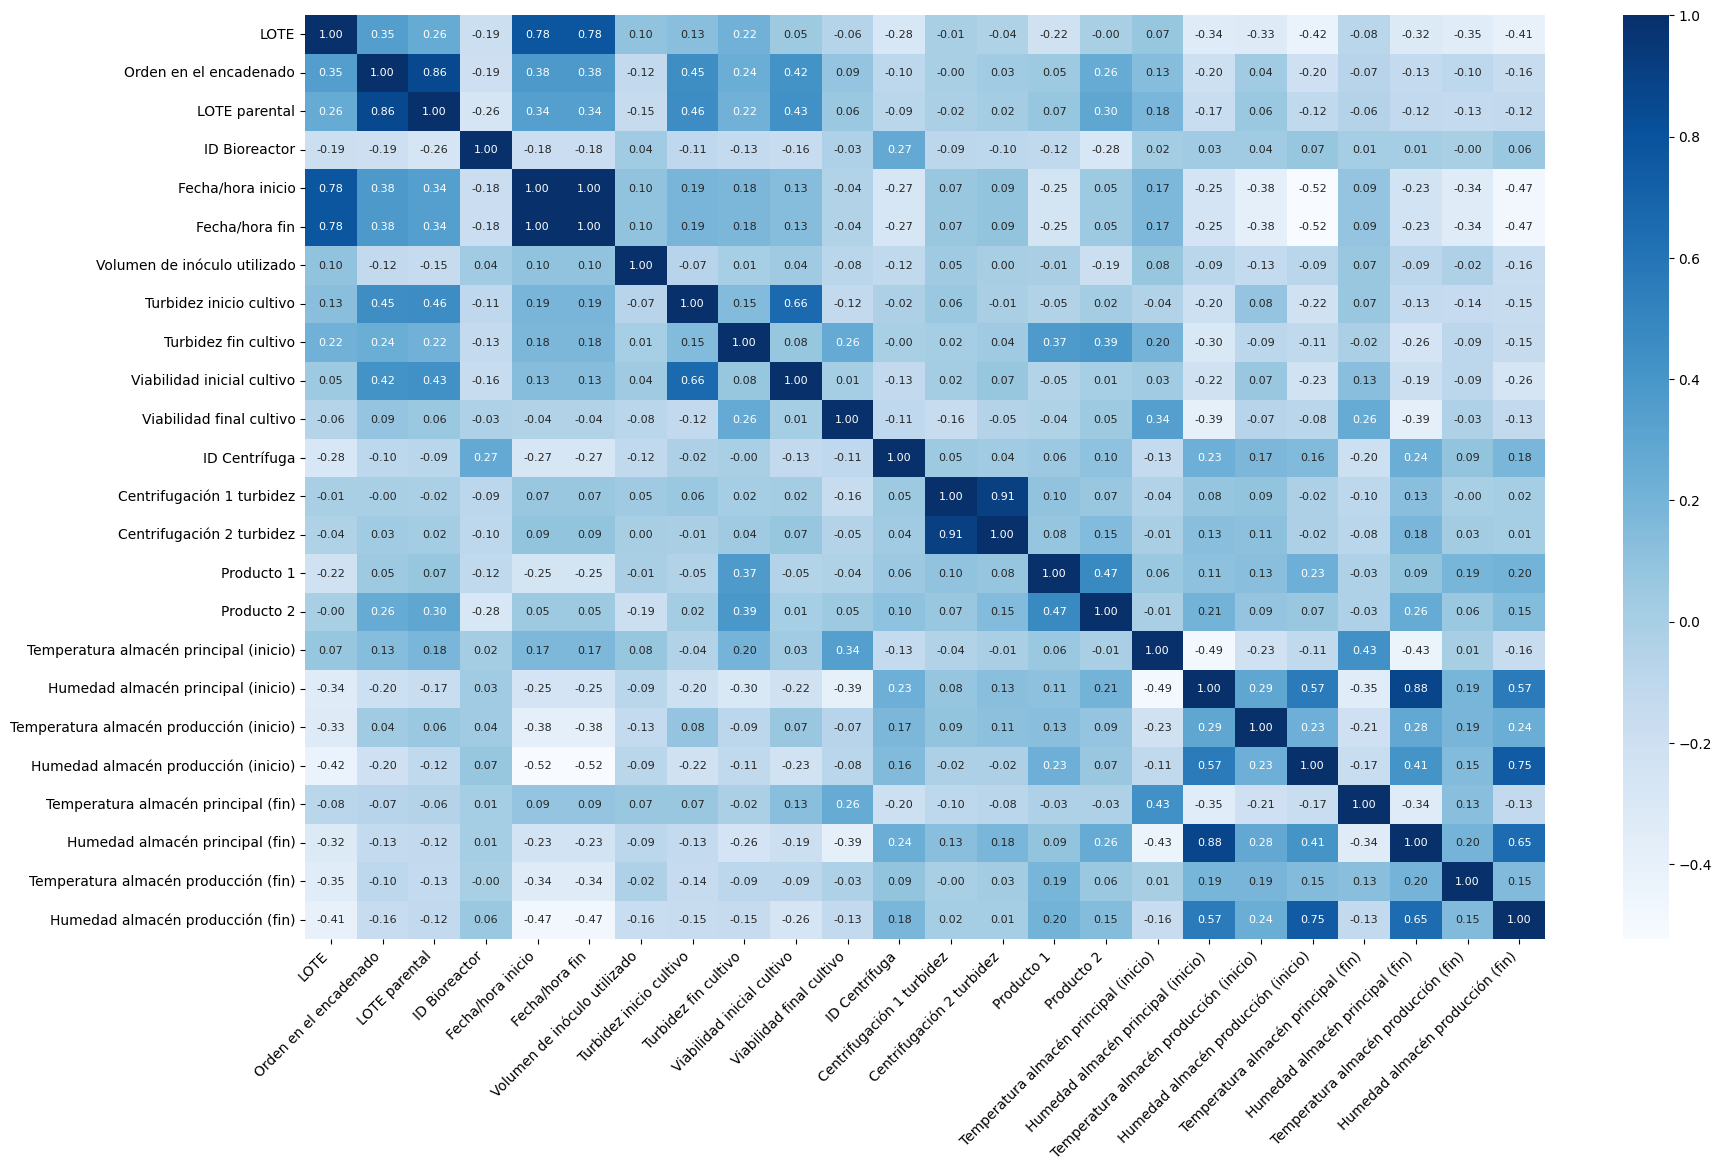

In [197]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(20, 12))

# Generar el heatmap
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 8}, fmt=".2f", cmap="Blues")

# Rotar las etiquetas del eje X para que no se sobrepongan
plt.xticks(rotation=45, ha="right")

# Mostrar el gráfico
plt.show()

In [198]:
df.to_csv("Datos precisión y temperaturas.csv", index=False)

In [49]:
df_test = pd.read_csv("Datos cultivos productivos\Fases producción_test v02.csv",sep=";",encoding="ANSI")
df_test = df_test.iloc[:,:15]


In [50]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   LOTE                          56 non-null     int64  
 1   Orden en el encadenado        56 non-null     int64  
 2   LOTE parental                 22 non-null     float64
 3   ID Bioreactor                 56 non-null     int64  
 4   Fecha/hora inicio             56 non-null     object 
 5   Fecha/hora fin                56 non-null     object 
 6   Volumen de inóculo utilizado  43 non-null     float64
 7   Turbidez inicio cultivo       56 non-null     int64  
 8   Turbidez fin cultivo          56 non-null     int64  
 9   Viabilidad final cultivo      56 non-null     object 
 10  ID Centrífuga                 56 non-null     int64  
 11  Centrifugación 1 turbidez     56 non-null     int64  
 12  Centrifugación 2 turbidez     56 non-null     int64  
 13  Product

In [51]:
df_test = pd.merge(df_test,df_cin_fin_tur, left_on="LOTE", right_on="Lote", how="left")
df_test

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2,Lote,Turbidez inicial,Turbidez final
0,24054,1,NaN,14616,2024-04-16 08:12:00,2024-04-18 07:28:00,82.0,15,86,"1,85E+08",14246,28,24,NaN,NaN,24054.0,15.44,85.60
1,24055,1,NaN,14614,2024-04-13 08:18:00,2024-04-15 08:30:00,NaN,14,74,"1,75E+08",12912,31,23,NaN,NaN,24055.0,14.32,73.68
2,24056,1,NaN,14615,2024-04-13 08:18:00,2024-04-15 08:15:00,NaN,15,82,"1,68E+08",14246,30,29,NaN,NaN,24056.0,14.56,82.40
3,24057,1,NaN,13170,2024-04-16 08:12:00,2024-04-18 07:41:00,82.0,18,79,"1,81E+08",12912,31,25,NaN,NaN,24057.0,17.76,78.96
4,24058,2,24055.0,14614,2024-04-15 12:28:00,2024-04-17 08:14:00,87.0,18,82,"1,45E+08",12912,26,20,NaN,NaN,24058.0,18.00,82.40
5,24059,2,24056.0,14615,2024-04-15 12:27:00,2024-04-17 08:22:00,87.0,18,78,"1,66E+08",14246,27,24,NaN,NaN,24059.0,18.08,78.40
6,24060,1,NaN,13169,2024-04-20 09:19:00,2024-04-22 09:12:00,82.0,26,76,"1,62E+08",14246,33,18,NaN,NaN,24060.0,25.92,76.32
7,24061,1,NaN,14617,2024-04-20 09:24:00,2024-04-22 09:12:00,82.0,29,69,"1,49E+08",12912,28,15,NaN,NaN,24061.0,28.56,68.96
8,24062,3,24058.0,14614,2024-04-17 12:05:00,2024-04-19 08:05:00,87.0,19,80,"1,65E+08",12912,28,25,NaN,NaN,24062.0,18.88,84.00
9,24063,1,NaN,13170,2024-04-23 10:35:00,2024-04-25 11:14:00,NaN,16,69,"1,81E+08",12912,26,18,NaN,NaN,24063.0,15.52,68.72


In [52]:
df_test["Turbidez inicio cultivo"] = df_test["Turbidez inicial"]
df_test["Turbidez fin cultivo"] = df_test["Turbidez final"]
df_test.head()

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2,Lote,Turbidez inicial,Turbidez final
0,24054,1,NaN,14616,2024-04-16 08:12:00,2024-04-18 07:28:00,82.0,15.44,85.60,"1,85E+08",14246,28,24,NaN,NaN,24054.0,15.44,85.60
1,24055,1,NaN,14614,2024-04-13 08:18:00,2024-04-15 08:30:00,NaN,14.32,73.68,"1,75E+08",12912,31,23,NaN,NaN,24055.0,14.32,73.68
2,24056,1,NaN,14615,2024-04-13 08:18:00,2024-04-15 08:15:00,NaN,14.56,82.40,"1,68E+08",14246,30,29,NaN,NaN,24056.0,14.56,82.40
3,24057,1,NaN,13170,2024-04-16 08:12:00,2024-04-18 07:41:00,82.0,17.76,78.96,"1,81E+08",12912,31,25,NaN,NaN,24057.0,17.76,78.96
4,24058,2,24055.0,14614,2024-04-15 12:28:00,2024-04-17 08:14:00,87.0,18.00,82.40,"1,45E+08",12912,26,20,NaN,NaN,24058.0,18.00,82.40


In [53]:
df_test = df_test.drop(["Lote","Turbidez inicial","Turbidez final"],axis="columns")
df_test.head()

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2
0,24054,1,NaN,14616,2024-04-16 08:12:00,2024-04-18 07:28:00,82.0,15.44,85.60,"1,85E+08",14246,28,24,NaN,NaN
1,24055,1,NaN,14614,2024-04-13 08:18:00,2024-04-15 08:30:00,NaN,14.32,73.68,"1,75E+08",12912,31,23,NaN,NaN
2,24056,1,NaN,14615,2024-04-13 08:18:00,2024-04-15 08:15:00,NaN,14.56,82.40,"1,68E+08",14246,30,29,NaN,NaN
3,24057,1,NaN,13170,2024-04-16 08:12:00,2024-04-18 07:41:00,82.0,17.76,78.96,"1,81E+08",12912,31,25,NaN,NaN
4,24058,2,24055.0,14614,2024-04-15 12:28:00,2024-04-17 08:14:00,87.0,18.00,82.40,"1,45E+08",12912,26,20,NaN,NaN


In [54]:
df_test = pd.merge(df_test,df_cin_fin_via, left_on="LOTE", right_on="Lote", how= "left")
df_test.head()

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2,Lote,Viabilidad inicial,Viabilidad final
0,24054,1,NaN,14616,2024-04-16 08:12:00,2024-04-18 07:28:00,82.0,15.44,85.60,"1,85E+08",14246,28,24,NaN,NaN,24054.0,6000000.0,185000000.0
1,24055,1,NaN,14614,2024-04-13 08:18:00,2024-04-15 08:30:00,NaN,14.32,73.68,"1,75E+08",12912,31,23,NaN,NaN,24055.0,8420000.0,175000000.0
2,24056,1,NaN,14615,2024-04-13 08:18:00,2024-04-15 08:15:00,NaN,14.56,82.40,"1,68E+08",14246,30,29,NaN,NaN,24056.0,7380000.0,168000000.0
3,24057,1,NaN,13170,2024-04-16 08:12:00,2024-04-18 07:41:00,82.0,17.76,78.96,"1,81E+08",12912,31,25,NaN,NaN,24057.0,6710000.0,181000000.0
4,24058,2,24055.0,14614,2024-04-15 12:28:00,2024-04-17 08:14:00,87.0,18.00,82.40,"1,45E+08",12912,26,20,NaN,NaN,24058.0,12600000.0,145000000.0


In [55]:
df_test["Viabilidad final cultivo"] = df_test["Viabilidad final"]
df_test = df_test.drop(["Lote","Viabilidad final"], axis="columns")
df_test.head()

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2,Viabilidad inicial
0,24054,1,NaN,14616,2024-04-16 08:12:00,2024-04-18 07:28:00,82.0,15.44,85.60,185000000.0,14246,28,24,NaN,NaN,6000000.0
1,24055,1,NaN,14614,2024-04-13 08:18:00,2024-04-15 08:30:00,NaN,14.32,73.68,175000000.0,12912,31,23,NaN,NaN,8420000.0
2,24056,1,NaN,14615,2024-04-13 08:18:00,2024-04-15 08:15:00,NaN,14.56,82.40,168000000.0,14246,30,29,NaN,NaN,7380000.0
3,24057,1,NaN,13170,2024-04-16 08:12:00,2024-04-18 07:41:00,82.0,17.76,78.96,181000000.0,12912,31,25,NaN,NaN,6710000.0
4,24058,2,24055.0,14614,2024-04-15 12:28:00,2024-04-17 08:14:00,87.0,18.00,82.40,145000000.0,12912,26,20,NaN,NaN,12600000.0


In [56]:
temp_cols=df_test.columns.tolist()
index=df_test.columns.get_loc("Viabilidad inicial")
new_cols=temp_cols[0:index-6] +temp_cols[index:index+1] +  temp_cols[index-6:index]
df_test=df_test[new_cols]
df_test.head()

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad inicial,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2
0,24054,1,NaN,14616,2024-04-16 08:12:00,2024-04-18 07:28:00,82.0,15.44,85.60,6000000.0,185000000.0,14246,28,24,NaN,NaN
1,24055,1,NaN,14614,2024-04-13 08:18:00,2024-04-15 08:30:00,NaN,14.32,73.68,8420000.0,175000000.0,12912,31,23,NaN,NaN
2,24056,1,NaN,14615,2024-04-13 08:18:00,2024-04-15 08:15:00,NaN,14.56,82.40,7380000.0,168000000.0,14246,30,29,NaN,NaN
3,24057,1,NaN,13170,2024-04-16 08:12:00,2024-04-18 07:41:00,82.0,17.76,78.96,6710000.0,181000000.0,12912,31,25,NaN,NaN
4,24058,2,24055.0,14614,2024-04-15 12:28:00,2024-04-17 08:14:00,87.0,18.00,82.40,12600000.0,145000000.0,12912,26,20,NaN,NaN


In [57]:
df_test = df_test.rename(columns={"Viabilidad inicial": "Viabilidad inicial cultivo"})
df_test

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad inicial cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2
0,24054,1,NaN,14616,2024-04-16 08:12:00,2024-04-18 07:28:00,82.0,15.44,85.60,6000000.0,185000000.0,14246,28,24,NaN,NaN
1,24055,1,NaN,14614,2024-04-13 08:18:00,2024-04-15 08:30:00,NaN,14.32,73.68,8420000.0,175000000.0,12912,31,23,NaN,NaN
2,24056,1,NaN,14615,2024-04-13 08:18:00,2024-04-15 08:15:00,NaN,14.56,82.40,7380000.0,168000000.0,14246,30,29,NaN,NaN
3,24057,1,NaN,13170,2024-04-16 08:12:00,2024-04-18 07:41:00,82.0,17.76,78.96,6710000.0,181000000.0,12912,31,25,NaN,NaN
4,24058,2,24055.0,14614,2024-04-15 12:28:00,2024-04-17 08:14:00,87.0,18.00,82.40,12600000.0,145000000.0,12912,26,20,NaN,NaN
5,24059,2,24056.0,14615,2024-04-15 12:27:00,2024-04-17 08:22:00,87.0,18.08,78.40,12800000.0,167000000.0,14246,27,24,NaN,NaN
6,24060,1,NaN,13169,2024-04-20 09:19:00,2024-04-22 09:12:00,82.0,25.92,76.32,8040000.0,161000000.0,14246,33,18,NaN,NaN
7,24061,1,NaN,14617,2024-04-20 09:24:00,2024-04-22 09:12:00,82.0,28.56,68.96,5600000.0,149000000.0,12912,28,15,NaN,NaN
8,24062,3,24058.0,14614,2024-04-17 12:05:00,2024-04-19 08:05:00,87.0,18.88,84.00,12600000.0,159000000.0,12912,28,25,NaN,NaN
9,24063,1,NaN,13170,2024-04-23 10:35:00,2024-04-25 11:14:00,NaN,15.52,68.72,3030000.0,181000000.0,12912,26,18,NaN,NaN


In [59]:
df_test = pd.merge(df_test,df_cin_cen_tur, left_on="LOTE",right_on="Lote",how="left")
df_test.head()

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad inicial cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2,Lote,Turbidez inicial,Turbidez final
0,24054,1,NaN,14616,2024-04-16 08:12:00,2024-04-18 07:28:00,82.0,15.44,85.60,6000000.0,185000000.0,14246,28,24,NaN,NaN,24054.0,26.40,24.08
1,24055,1,NaN,14614,2024-04-13 08:18:00,2024-04-15 08:30:00,NaN,14.32,73.68,8420000.0,175000000.0,12912,31,23,NaN,NaN,24055.0,32.40,22.24
2,24056,1,NaN,14615,2024-04-13 08:18:00,2024-04-15 08:15:00,NaN,14.56,82.40,7380000.0,168000000.0,14246,30,29,NaN,NaN,24056.0,29.52,28.48
3,24057,1,NaN,13170,2024-04-16 08:12:00,2024-04-18 07:41:00,82.0,17.76,78.96,6710000.0,181000000.0,12912,31,25,NaN,NaN,24057.0,31.12,25.44
4,24058,2,24055.0,14614,2024-04-15 12:28:00,2024-04-17 08:14:00,87.0,18.00,82.40,12600000.0,145000000.0,12912,26,20,NaN,NaN,24058.0,26.72,20.56


In [60]:
df_test["Centrifugación 1 turbidez"] = df_test["Turbidez inicial"]
df_test["Centrifugación 2 turbidez"] = df_test["Turbidez final"]
df_test.head()

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad inicial cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2,Lote,Turbidez inicial,Turbidez final
0,24054,1,NaN,14616,2024-04-16 08:12:00,2024-04-18 07:28:00,82.0,15.44,85.60,6000000.0,185000000.0,14246,26.40,24.08,NaN,NaN,24054.0,26.40,24.08
1,24055,1,NaN,14614,2024-04-13 08:18:00,2024-04-15 08:30:00,NaN,14.32,73.68,8420000.0,175000000.0,12912,32.40,22.24,NaN,NaN,24055.0,32.40,22.24
2,24056,1,NaN,14615,2024-04-13 08:18:00,2024-04-15 08:15:00,NaN,14.56,82.40,7380000.0,168000000.0,14246,29.52,28.48,NaN,NaN,24056.0,29.52,28.48
3,24057,1,NaN,13170,2024-04-16 08:12:00,2024-04-18 07:41:00,82.0,17.76,78.96,6710000.0,181000000.0,12912,31.12,25.44,NaN,NaN,24057.0,31.12,25.44
4,24058,2,24055.0,14614,2024-04-15 12:28:00,2024-04-17 08:14:00,87.0,18.00,82.40,12600000.0,145000000.0,12912,26.72,20.56,NaN,NaN,24058.0,26.72,20.56


In [61]:
df_test = df_test.drop(["Lote","Turbidez inicial","Turbidez final"],axis="columns")
df_test.head()

,LOTE,Orden en el encadenado,LOTE parental,ID Bioreactor,Fecha/hora inicio,Fecha/hora fin,Volumen de inóculo utilizado,Turbidez inicio cultivo,Turbidez fin cultivo,Viabilidad inicial cultivo,Viabilidad final cultivo,ID Centrífuga,Centrifugación 1 turbidez,Centrifugación 2 turbidez,Producto 1,Producto 2
0,24054,1,NaN,14616,2024-04-16 08:12:00,2024-04-18 07:28:00,82.0,15.44,85.60,6000000.0,185000000.0,14246,26.40,24.08,NaN,NaN
1,24055,1,NaN,14614,2024-04-13 08:18:00,2024-04-15 08:30:00,NaN,14.32,73.68,8420000.0,175000000.0,12912,32.40,22.24,NaN,NaN
2,24056,1,NaN,14615,2024-04-13 08:18:00,2024-04-15 08:15:00,NaN,14.56,82.40,7380000.0,168000000.0,14246,29.52,28.48,NaN,NaN
3,24057,1,NaN,13170,2024-04-16 08:12:00,2024-04-18 07:41:00,82.0,17.76,78.96,6710000.0,181000000.0,12912,31.12,25.44,NaN,NaN
4,24058,2,24055.0,14614,2024-04-15 12:28:00,2024-04-17 08:14:00,87.0,18.00,82.40,12600000.0,145000000.0,12912,26.72,20.56,NaN,NaN


In [62]:
df_test.to_csv("Datos alta precisión test.csv", index=False)